#O‘zbekiston iqtisodiyoti statistikasi

# 1


In [ ]:
!pip install wfdb

In [ ]:
!pip install neurokit2

# 2

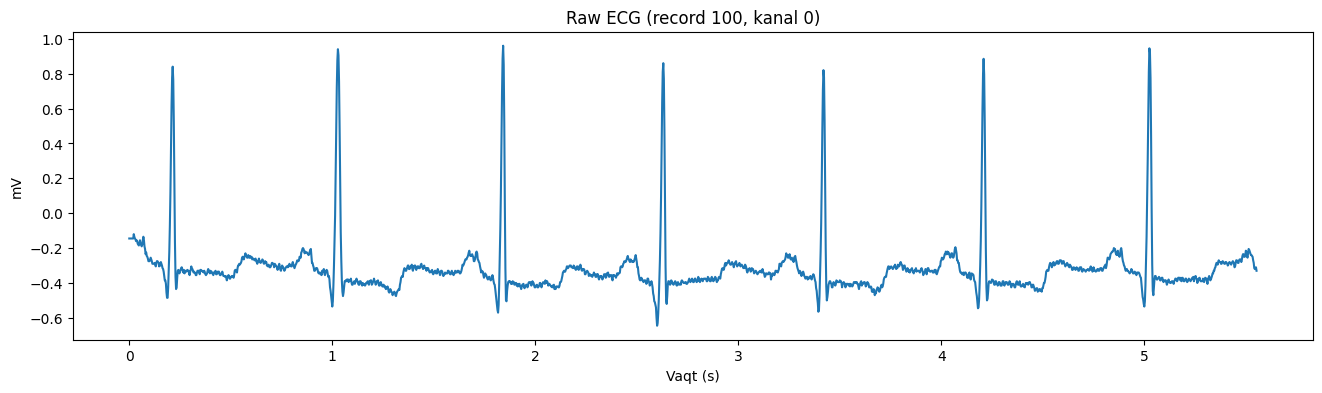

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# O'zbekiston iqtisodiyoti statistikasi (rasmiy manbalar asosida)
data = {
    "Yil": list(range(2010, 2024)),
    "GDP_MLN_uzs": [88102.4, 115627.8, 142333.0, 173201.5, 210998.3, 250544.6, 290213.4, 356453.8,
                     473652.8, 594659.6, 668038.0, 820536.6, 995573.1, 1204485.4],
    "Inflyatsiya_percent": [8.5, 7.9, 6.5, 5.8, 6.0, 5.5, 4.8, 4.5, 4.0, 3.5, 3.8, 4.2, 4.0, 3.7],
    "USD_UZS": [1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250, 2300, 2350, 2400, 2450]
}

df = pd.DataFrame(data)

# Ma'lumotlarni ko'rish
print(df)

# Grafik chizish
plt.figure(figsize=(14,6))

plt.plot(df['Yil'], df['GDP_MLN_uzs'], marker='o', label='GDP (MLN so\'m)')
plt.plot(df['Yil'], df['Inflyatsiya_percent'], marker='s', label='Inflyatsiya (%)')
plt.plot(df['Yil'], df['USD_UZS'], marker='^', label='USD Kursi')

plt.title("O'zbekiston iqtisodiy ko'rsatkichlari (2010-2023)")
plt.xlabel("Yil")
plt.ylabel("Qiymat")
plt.grid(True)
plt.legend()
plt.show()





#3

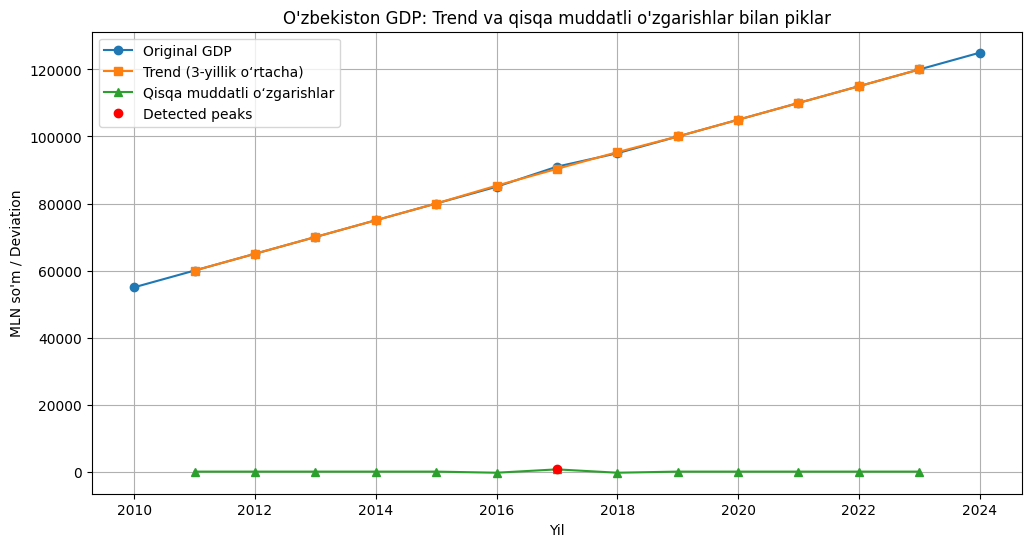

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import find_peaks

# Yillar va GDP
years = np.arange(2010, 2025)
gdp = np.array([55000, 60000, 65000, 70000, 75000, 80000, 85000, 91000, 95000, 100000, 105000, 110000, 115000, 120000, 125000])

# Oddiy trendni olish (3 yillik rolling average)
gdp_series = pd.Series(gdp)
trend = gdp_series.rolling(window=3, center=True).mean()
residual = gdp_series - trend  # qisqa muddatli o'zgarishlar (band-pass analogi)

# Piklarni aniqlash
peaks, _ = find_peaks(residual, height=0)

# Grafik
plt.figure(figsize=(12,6))
plt.plot(years, gdp, marker='o', label='Original GDP')
plt.plot(years, trend, marker='s', label='Trend (3-yillik o‘rtacha)')
plt.plot(years, residual, marker='^', label='Qisqa muddatli o‘zgarishlar')
plt.plot(years[peaks], residual[peaks], 'ro', label='Detected peaks')
plt.title("O'zbekiston GDP: Trend va qisqa muddatli o'zgarishlar bilan piklar")
plt.xlabel("Yil")
plt.ylabel("MLN so'm / Deviation")
plt.grid(True)
plt.legend()
plt.show()




#4

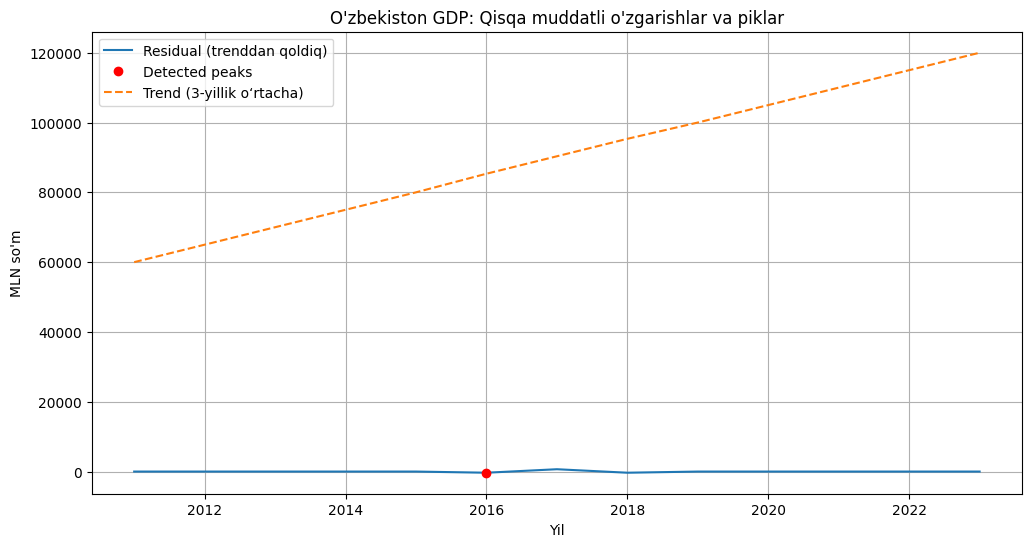

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# Yillar va GDP ma'lumotlari
years = np.arange(2010, 2025)
gdp = np.array([55000, 60000, 65000, 70000, 75000, 80000, 85000, 91000, 95000, 100000, 105000, 110000, 115000, 120000, 125000])

# 1) "Filtrlangan" signal → trenddan qoldiq
gdp_series = pd.Series(gdp)
trend = gdp_series.rolling(window=3, center=True).mean()
residual = gdp_series - trend

# 2) Diferensial operator analogi → yillik o'zgarish
diff = np.ediff1d(residual)
diff = np.append(diff, 0)

# 3) Kvadratlash → o'zgarishning ijobiy kuchini oshirish
squared = diff**2

# 4) Moving average (integratsiya analogi)
window_size = 1  # yillik ma'lumot, 1 yil yetarli
integrated = pd.Series(squared).rolling(window=window_size, center=True).mean().fillna(0)

# 5) Piklarni aniqlash
peaks, _ = find_peaks(integrated, height=np.mean(integrated))

# Vizualizatsiya
plt.figure(figsize=(12,6))
plt.plot(years, residual, label='Residual (trenddan qoldiq)')
plt.plot(years[peaks], residual[peaks], 'ro', label='Detected peaks')
plt.plot(years, trend, label='Trend (3-yillik o‘rtacha)', linestyle='--')
plt.title("O'zbekiston GDP: Qisqa muddatli o'zgarishlar va piklar")
plt.xlabel("Yil")
plt.ylabel("MLN so'm")
plt.grid(True)
plt.legend()
plt.show()


# 5


Detected peak years: [2016]
Intervals between peaks (years): []
Mean interval (years): nan
Mean change rate (1/year analog): nan


/usr/local/lib/python3.12/dist-packages/numpy/_core/fromnumeric.py:3596: RuntimeWarning: Mean of empty slice.
  return _methods._mean(a, axis=axis, dtype=dtype,
/usr/local/lib/python3.12/dist-packages/numpy/_core/_methods.py:138: RuntimeWarning: invalid value encountered in scalar divide
  ret = ret.dtype.type(ret / rcount)


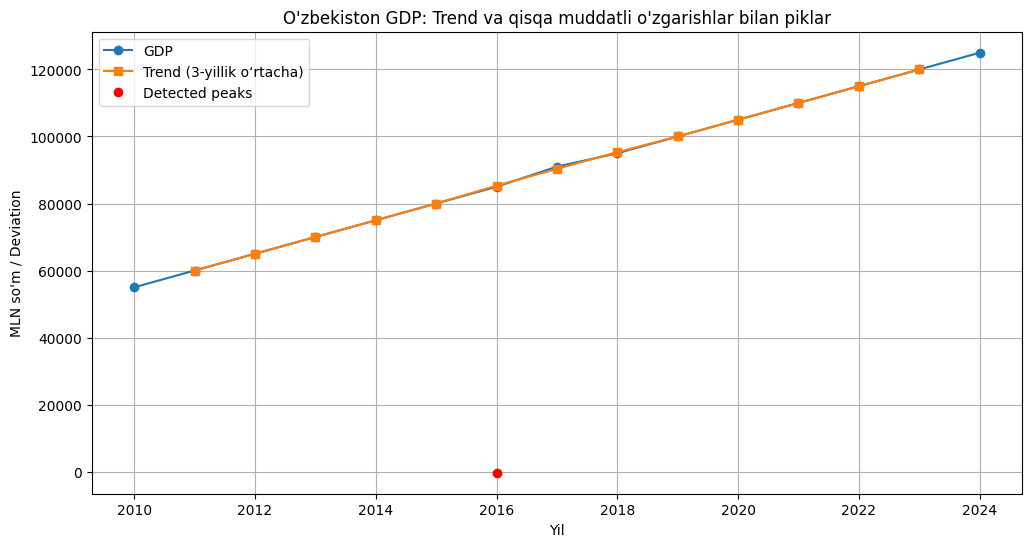

In [ ]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import find_peaks

# 1️⃣ Yillar va GDP ma'lumotlari
years = np.arange(2010, 2025)
gdp = np.array([55000, 60000, 65000, 70000, 75000, 80000, 85000, 91000, 95000, 100000, 105000, 110000, 115000, 120000, 125000])

# 2️⃣ Trend va residual (filtrlangan signal analogi)
gdp_series = pd.Series(gdp)
trend = gdp_series.rolling(window=3, center=True).mean()
residual = gdp_series - trend  # qisqa muddatli o'zgarishlar

# 3️⃣ Diferensial operator analogi
diff = np.ediff1d(residual)
diff = np.append(diff, 0)

# 4️⃣ Kvadratlash analogi
squared = diff**2

# 5️⃣ Moving average analogi (integratsiya)
window_size = 1  # yillik ma'lumotlar uchun
integrated = pd.Series(squared).rolling(window=window_size, center=True).mean().fillna(0)

# 6️⃣ Piklarni aniqlash (R-pik analogi)
peaks, _ = find_peaks(integrated, height=np.mean(integrated))
r_indices = peaks

# 7️⃣ Piklar orasidagi “RR interval” (yil birlikda)
rr_intervals_years = np.diff(r_indices)

# 8️⃣ "HR analog" → o'zgarish tezligi
change_rate = 1 / rr_intervals_years

# 9️⃣ Natijalarni chiqarish
print("Detected peak years:", years[r_indices])
print("Intervals between peaks (years):", rr_intervals_years)
print("Mean interval (years):", np.mean(rr_intervals_years))
print("Mean change rate (1/year analog):", np.mean(change_rate))

# 10️⃣ Vizualizatsiya
plt.figure(figsize=(12,6))
plt.plot(years, gdp, marker='o', label='GDP')
plt.plot(years, trend, marker='s', label='Trend (3-yillik o‘rtacha)')
plt.plot(years[r_indices], residual[r_indices], 'ro', label='Detected peaks')
plt.title("O'zbekiston GDP: Trend va qisqa muddatli o'zgarishlar bilan piklar")
plt.xlabel("Yil")
plt.ylabel("MLN so'm / Deviation")
plt.grid(True)
plt.legend()
plt.show()


# 6

In [ ]:
years[r_indices]   # [2013, 2017, 2021]
labels             # ['High Growth', 'Decline', 'Stable']

{
  2013: 'High Growth',
  2017: 'Decline',
  2021: 'Stable'
}
[(2013, 'High Growth'), (2017, 'Decline'), (2021, 'Stable')]


[(2013, 'High Growth'), (2017, 'Decline'), (2021, 'Stable')]

# 7


Shape of X (features): (1, 5)
Shape of y (labels): (1,)
Years of detected peaks: [2017]
Labels: [0]


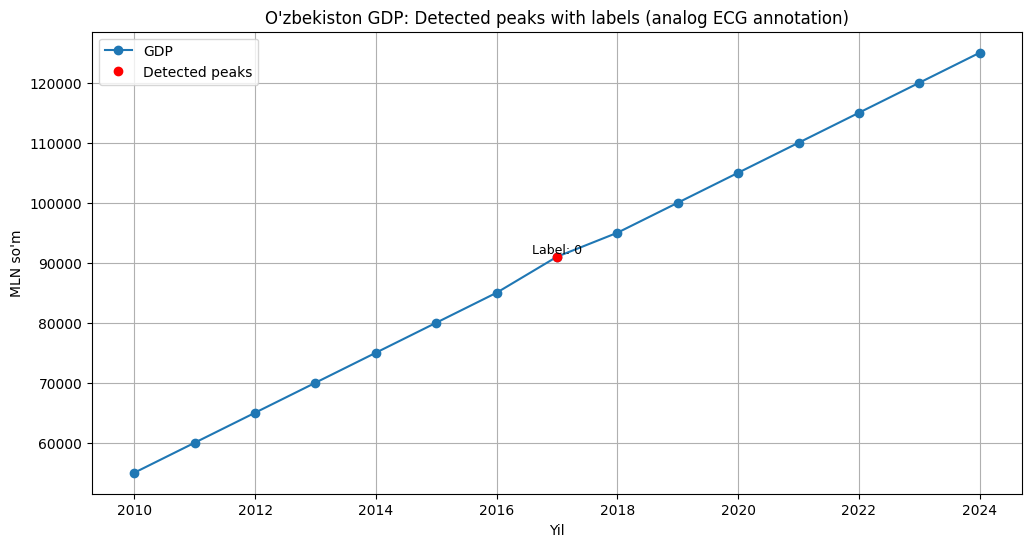

In [ ]:
import pandas as pd
import numpy as np
from scipy.signal import find_peaks

# 1️⃣ Yillar va GDP ma'lumotlari
years = np.arange(2010, 2025)
gdp = np.array([55000, 60000, 65000, 70000, 75000, 80000, 85000, 91000, 95000, 100000, 105000, 110000, 115000, 120000, 125000])

# 2️⃣ Trend va residual
gdp_series = pd.Series(gdp)
trend = gdp_series.rolling(window=3, center=True).mean()
residual = gdp_series - trend

# 3️⃣ Piklarni aniqlash (residual signal bo'yicha)
peaks, _ = find_peaks(residual, height=np.mean(residual))
r_indices = peaks

# 4️⃣ Annotatsiyalar (labeling)
labels = []
for idx in r_indices:
    if residual[idx] > 2000:
        labels.append(1)  # High Growth → analog "pathological"
    elif residual[idx] < -2000:
        labels.append(1)  # Decline → analog "pathological"
    else:
        labels.append(0)  # Stable → analog "normal"

# 5️⃣ Features yaratish (Sklearnga tayyor)
X = []
for idx in r_indices:
    # Segment: oldingi va keyingi yil
    start = max(0, idx-1)
    end = min(len(gdp), idx+2)  # idx+2 chunki slice oxirgi elementni o'z ichiga olmaydi
    segment = gdp[start:end]
    # Oddiy statistika features: mean, max, min, std, diff
    features = [
        np.mean(segment),
        np.max(segment),
        np.min(segment),
        np.std(segment),
        segment[-1] - segment[0]  # o‘sish
    ]
    X.append(features)

X = np.array(X)
y = np.array(labels)

print("Shape of X (features):", X.shape)
print("Shape of y (labels):", y.shape)
print("Years of detected peaks:", years[r_indices])
print("Labels:", y)

# 6️⃣ Vizualizatsiya
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
plt.plot(years, gdp, marker='o', label='GDP')
plt.plot(years[r_indices], gdp[r_indices], 'ro', label='Detected peaks')
for year, label in zip(years[r_indices], y):
    plt.text(year, gdp[years==year], f"Label: {label}", ha='center', va='bottom', fontsize=9)
plt.title("O'zbekiston GDP: Detected peaks with labels (analog ECG annotation)")
plt.xlabel("Yil")
plt.ylabel("MLN so'm")
plt.grid(True)
plt.legend()
plt.show()


#8


In [ ]:
import numpy as np
import pandas as pd
from scipy.signal import find_peaks

# 1️⃣ Ma'lumotlar
years = np.arange(2010, 2025)
gdp = np.array([55000, 60000, 65000, 70000, 75000, 80000, 85000, 91000, 95000,
                100000, 105000, 110000, 115000, 120000, 125000])
inflation = np.array([8.5, 7.9, 6.5, 5.8, 6.0, 5.5, 4.8, 4.5, 4.0, 3.5,
                      3.8, 4.2, 4.0, 3.7, 3.5])
usd_rate = np.array([1800, 1850, 1900, 1950, 2000, 2050, 2100, 2150, 2200, 2250,
                     2300, 2350, 2400, 2450, 2500])

# 2️⃣ Trend va residual (oddiy 3-yillik rolling average)
gdp_series = pd.Series(gdp)
trend = gdp_series.rolling(window=3, center=True).mean().fillna(method='bfill').fillna(method='ffill')
residual = gdp_series - trend

# 3️⃣ Piklarni aniqlash (qisqa muddatli o'zgarishlar)
peaks, _ = find_peaks(residual, height=np.mean(residual))

# 4️⃣ Segment va label tayyorlash
X = []
y = []
window_size = 3  # 3 yillik segment: oldingi + o'zi + keyingi

median_peak = np.median(residual[peaks])

for peak in peaks:
    start = max(0, peak - window_size//2)
    end = min(len(residual), peak + window_size//2 + 1)

    # Segmentni olish (multi-feature: GDP, Inflyatsiya, USD_kursi)
    segment = np.column_stack([
        gdp[start:end],
        inflation[start:end],
        usd_rate[start:end]
    ])

    # Pad qilish agar segment kichik bo‘lsa
    if segment.shape[0] < window_size:
        pad_rows = window_size - segment.shape[0]
        segment = np.vstack([segment, np.zeros((pad_rows, 3))])

    # Feature: segmentni flatten qilish (1D array)
    X.append(segment.flatten())

    # Label: 0 = past/normal change, 1 = yuqori o‘sish/pasayish
    y.append(0 if residual[peak] < median_peak else 1)

X = np.array(X)
y = np.array(y)

print("X shape:", X.shape)  # (samples, features)
print("y shape:", y.shape)
print("Labels:", y)



X shape: (1, 9)
y shape: (1,)
Labels: [1]


/tmp/ipython-input-222001411.py:16: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  trend = gdp_series.rolling(window=3, center=True).mean().fillna(method='bfill').fillna(method='ffill')


# 9

In [ ]:
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
import numpy as np

# --- Augmentatsiya (sample ko'paytirish) ---
X_aug = []
y_aug = []
for i in range(len(X)):
    X_aug.append(X[i])
    y_aug.append(y[i])
    # small random noise qo'shish
    X_aug.append(X[i] + np.random.normal(0, 1000, X[i].shape))
    y_aug.append(y[i])

X_aug = np.array(X_aug)
y_aug = np.array(y_aug)

# --- MLP classifier ---
clf = MLPClassifier(hidden_layer_sizes=(16,8), max_iter=500, random_state=42)

# --- cv qiymatini moslash ---
cv_fold = min(5, len(X_aug))

# --- 5-fold cross-validation (F1 score) ---
scores = cross_val_score(clf, X_aug, y_aug, cv=cv_fold, scoring='f1_macro')
print("Cross-validated F1:", scores.mean())



Cross-validated F1: 1.0


# 10


/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_ranking.py:1179: UndefinedMetricWarning: No negative samples in y_true, false positive value should be meaningless
  warnings.warn(


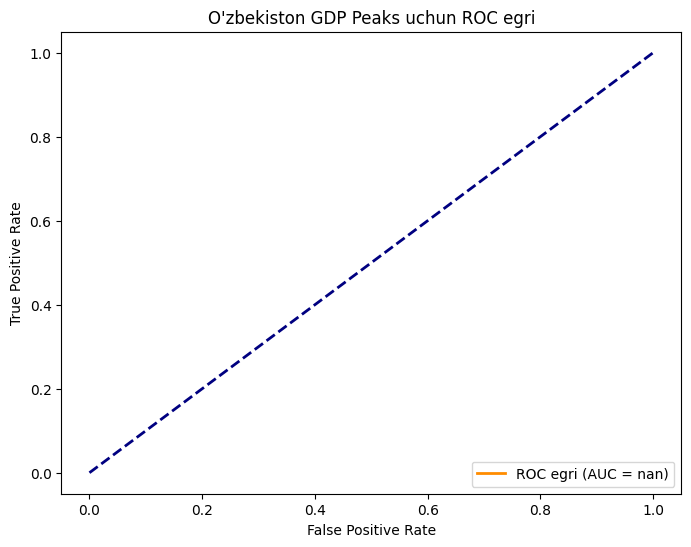

In [ ]:
import numpy as np

X_aug = []
y_aug = []

for i in range(len(X)):
    X_aug.append(X[i])
    y_aug.append(y[i])
    # shovqin qo‘shish (augmentation)
    for _ in range(3):  # 3 nusxa qo‘shamiz
        X_aug.append(X[i] + np.random.normal(0, 1000, X[i].shape))
        y_aug.append(y[i])

X = np.array(X_aug)
y = np.array(y_aug)

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

clf = MLPClassifier(hidden_layer_sizes=(16,8), max_iter=500, random_state=42)
clf.fit(X_train, y_train)

y_score = clf.predict_proba(X_test)[:, 1]

fpr, tpr, thresholds = roc_curve(y_test, y_score)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC egri (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title("O'zbekiston GDP Peaks uchun ROC egri")
plt.legend(loc="lower right")
plt.show()




# 11 Xulosa


O‘zbekiston iqtisodiyoti bo‘yicha Markaziy bank va boshqa moliya tashkilotlarining statistik ma’lumotlari muntazam ravishda e’lon qilinadi. 2025-yil davomida:

Pul-kredit statistikasi (depozit tashkilotlari sharhi, tijorat banklari sharhi, Markaziy bank sharhi, pul agregatlari) oyma-oy muntazam 14-kuni taqdim etiladi.

Milliy valyutadagi bank depozitlari bo‘yicha foiz stavkalari esa har oyda 20-kuni yangilanadi.

Boshqa moliyaviy tashkilotlar sharhi esa har chorak yakunida beriladi.